Question #1

In [8]:
import quandl

In [9]:
from matplotlib import pyplot as plt

In [10]:
import pandas

In [12]:
with open('quandl_key.txt','r') as q:
    key = q.read()

In [21]:
arm=quandl.get('WORLDBANK/ARM_TOT',authtoken=key)

In [22]:
lux=quandl.get('WORLDBANK/LUX_TOT',authtoken=key)

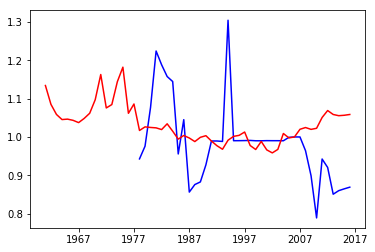

In [26]:
plt.plot(arm, "b")
plt.plot(lux, "r")
plt.show()

Question#2

In [36]:
str(arm.nlargest(2, "Value")['Value'][1])

'1.22417921215'

Question#3

In [45]:
exp=quandl.get('WTO/MERCH_EXP_ARM',authtoken=key)

In [46]:
imp=quandl.get('WTO/MERCH_IMP_ARM',authtoken=key)

In [47]:
net_exp=exp-imp

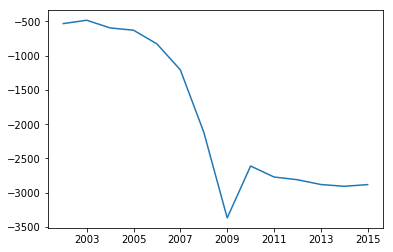

In [48]:
plt.plot(net_exp)
plt.show()

Question #4

In [64]:
goldman=quandl.get('EOD/GS',authtoken=key)['Open']

In [65]:
verizon=quandl.get('EOD/VZ',authtoken=key)['Open']

In [66]:
boeing=quandl.get('EOD/BA',authtoken=key)['Open']

In [67]:
data=quandl.get(['EOD/GS','EOD/VZ','EOD/BA'],trim_start="1999-06-01",column_index=1,authtoken=key)
data.head()

,EOD/GS - Open,EOD/VZ - Open,EOD/BA - Open
Date,,,
1999-06-01,66.63,54.75,42.13
1999-06-02,63.75,55.25,42.38
1999-06-03,64.00,54.75,42.19
1999-06-04,64.31,54.88,42.75
1999-06-07,65.19,55.56,43.50


In [69]:
corr=data.corr()
data.corr()

,EOD/GS - Open,EOD/VZ - Open,EOD/BA - Open
EOD/GS - Open,1.000000,-0.008853,0.791145
EOD/VZ - Open,-0.008853,1.000000,0.323711
EOD/BA - Open,0.791145,0.323711,1.000000


Question #5

In [70]:
import googlemaps

In [72]:
from datetime import datetime

In [73]:
import re

In [74]:
with open("google_key.txt","r") as f:
    google_key=f.read()
gmaps=googlemaps.Client(google_key)

In [75]:
kilometers=[]
city_list=["Philadelphia, PA","Las Vegas, NV","Los Angeles, CA",'Stamford, CT',"Alabama, AL",
           "Boston, MA",'Kansas City, MO', "Deleware, DE",'Salt Lake City, UT',"Oklahoma City, OK"]
for i in city_list:
    directions=gmaps.directions(i,"New York, NY",units="metric") 
    kilometers.append(directions[0]['legs'][0]['distance'])
    
kilometers

[{u'text': u'155 km', u'value': 155376},
 {u'text': u'4,070 km', u'value': 4070225},
 {u'text': u'4,501 km', u'value': 4501098},
 {u'text': u'67.8 km', u'value': 67790},
 {u'text': u'1,711 km', u'value': 1710658},
 {u'text': u'349 km', u'value': 348934},
 {u'text': u'1,918 km', u'value': 1918299},
 {u'text': u'302 km', u'value': 302027},
 {u'text': u'3,509 km', u'value': 3509123},
 {u'text': u'2,335 km', u'value': 2334745}]

In [113]:
data_list=[]
for i in range(0,len(kilometers)):
    dictionary={"city":city_list[i],'distance':str(kilometers[i])  
    }
    data_list.append(dictionary)
data_list

[{'city': 'Philadelphia, PA',
  'distance': "{u'text': u'155 km', u'value': 155376}"},
 {'city': 'Las Vegas, NV',
  'distance': "{u'text': u'4,070 km', u'value': 4070225}"},
 {'city': 'Los Angeles, CA',
  'distance': "{u'text': u'4,501 km', u'value': 4501098}"},
 {'city': 'Stamford, CT',
  'distance': "{u'text': u'67.8 km', u'value': 67790}"},
 {'city': 'Alabama, AL',
  'distance': "{u'text': u'1,711 km', u'value': 1710658}"},
 {'city': 'Boston, MA', 'distance': "{u'text': u'349 km', u'value': 348934}"},
 {'city': 'Kansas City, MO',
  'distance': "{u'text': u'1,918 km', u'value': 1918299}"},
 {'city': 'Deleware, DE',
  'distance': "{u'text': u'302 km', u'value': 302027}"},
 {'city': 'Salt Lake City, UT',
  'distance': "{u'text': u'3,509 km', u'value': 3509123}"},
 {'city': 'Oklahoma City, OK',
  'distance': "{u'text': u'2,335 km', u'value': 2334745}"}]